In [3]:
# Import the necessary libraries
import tensorflow as tf
import os
import numpy as np
np.random.seed(42)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
print(tf.__version__)

2.4.1


In [4]:
DATASET = 'mnist.pkl'

with open(DATASET, 'rb') as file:
    mnist = pickle.load(file)

X = np.array(mnist['data'])
y = np.array(mnist['target'])
y = y.astype(np.uint8)  # Optimization

training_images, test_images, training_labels, test_labels = train_test_split(X, y, test_size=10000, random_state=42)

# Shape of data
print(type(training_images), type(training_labels))
print(training_images.shape, training_labels.shape)
print(test_images.shape, test_labels.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 784) (60000,)
(10000, 784) (10000,)


2          4          0          1          6          6          9          0          3          4          

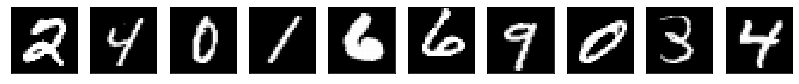

In [5]:
# Visualize data
plt.figure(1, figsize=(14,3))

for i in range(10):
    print(training_labels[i], end='          ')
    plt.subplot(1,10,i+1)
    plt.imshow(training_images[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [6]:
# Normalize data
training_images = training_images / 255.0
test_images = test_images / 255.0

In [29]:
# Model
model = tf.keras.models.Sequential([  # A sequence of layers in a neural network
                                    tf.keras.Input(shape=(28,28)),
                                    tf.keras.layers.Flatten(),  # Similar to np.reshape((28, 28))
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),  # 1024 neuron hidden layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer, 10 neurons
])

# Train
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3032 - accuracy: 0.9086
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0730 - accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0225 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0115 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [14]:
# Train
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3019 - accuracy: 0.9112
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0751 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0469 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0309 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0228 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0169 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0127 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9785


[0.09834393858909607, 0.9785000085830688]

In [18]:
os.remove('./saved_model.pb')
model.save('./')

INFO:tensorflow:Assets written to: ./assets


In [19]:
model_l = tf.keras.models.load_model('./')
model_l.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0983 - accuracy: 0.9785


[0.09834393858909607, 0.9785000085830688]

In [28]:
model_l.predict(test_images[0].reshape(784))
# print(test_images[0].shape)

ValueError: in user code:

    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 1)
